## Reto 5: Distribución de ratings de las películas más valoradas

### 1. Objetivos:
    - Practicar las siguientes herramientas:
        - Lectura de .csv
        - `merge`
        - Creación de filtros usando `apply`
    
---
    
### 2. Desarrollo:

#### a) Creando un box plot de distribución de ratings

Vamos a ver cómo están distribuidos los ratings de las películas más valoradas de nuestro dataset. La siguiente es una lista de las películas que tienen más de 2500 valoraciones en nuestro dataset:

`[2858, 260, 1196, 1210, 480, 2028, 589, 2571, 1270, 593, 1580, 1198, 608]`

Realiza los siguientes pasos:

1. Lee tus archivos `ratings` y `movies`.
2. Obtén una lista con los ids de las películas con más de 2500 valoraciones.Debe ser igual a la lista de arriba.
3. Crea una función que tome una lista de ids y un id y regrese `True` si el id se encuentra en la lista (puedes usar el operador `in` de Python).
4. Usa `apply` para aplicar esa función a la columna `ratings['movie_id']` y obtener un filtro.
5. Usa tu filtro para filtrar el `DataFrame` `ratings` y quedarte solamente con las entradas de las películas que fueron valoradas más de 2500 veces.
6. Usando `merge` agrega los nombres de las películas a tu `DataFrame` `ratings`. Asigna el resultado a la variable `ratings_filtrados_con_nombre`.

> **Nota** el paso #4 es algo complejo. Si tienes dificultades para realizarlo, ¡no dudes en pedirle ayuda a tu experta!

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importar pands
import pandas as pd

In [11]:
#leemos los archivos movies y ratings
movies = pd.read_csv('/content/drive/MyDrive/BEDU/movies.csv');
ratings = pd.read_csv('/content/drive/MyDrive/BEDU/ratings.csv');

In [4]:
# ponemos los indices
movies = movies.set_index('movies_id',drop=True)

In [15]:
#creamos el filtro
df_cuantas_valoraciones = ratings['movie_id'].value_counts()
filtro_mayor_2500 = df_cuantas_valoraciones > 2500

In [19]:
#filtramos el dataframe
df_filtrado = df_cuantas_valoraciones[filtro_mayor_2500]
df_filtrado

2858    3428
260     2991
1196    2990
1210    2883
480     2672
2028    2653
589     2649
2571    2590
1270    2583
593     2578
1580    2538
1198    2514
608     2513
Name: movie_id, dtype: int64

In [22]:
lista_indices = [index for index in df_filtrado.index]
lista_indices

[2858, 260, 1196, 1210, 480, 2028, 589, 2571, 1270, 593, 1580, 1198, 608]

In [29]:
#hacemos merge
combinado = pd.merge(df_filtrado, movies, left_index=True, right_index=True)[['movie','movie_id']]
combinado.columns = ['title','rating']
combinado

,title,rating
2858,Brief Encounter (1946),3428
260,Ladybird Ladybird (1994),2991
1196,Alien (1979),2990
1210,Raging Bull (1980),2883
480,Lassie (1994),2672
2028,Something Wicked This Way Comes (1983),2653
589,"Silence of the Lambs, The (1991)",2649
2571,Superman (1978),2590
1270,Some Kind of Wonderful (1987),2583
593,Pretty Woman (1990),2578


In [31]:

ratings_filtrados_con_nombre = combinado

Pídele a tu experta la función de verificación `visualizar_boxplots` (encontrada en el archivo `helpers.py` de la carpeta donde se encuentra este Reto), pégala debajo y corre la celda para verificar tu resultado. Tu `DataFrame` debe de tener una columna `title` y otra `rating` para que la visualización pueda funcionar:

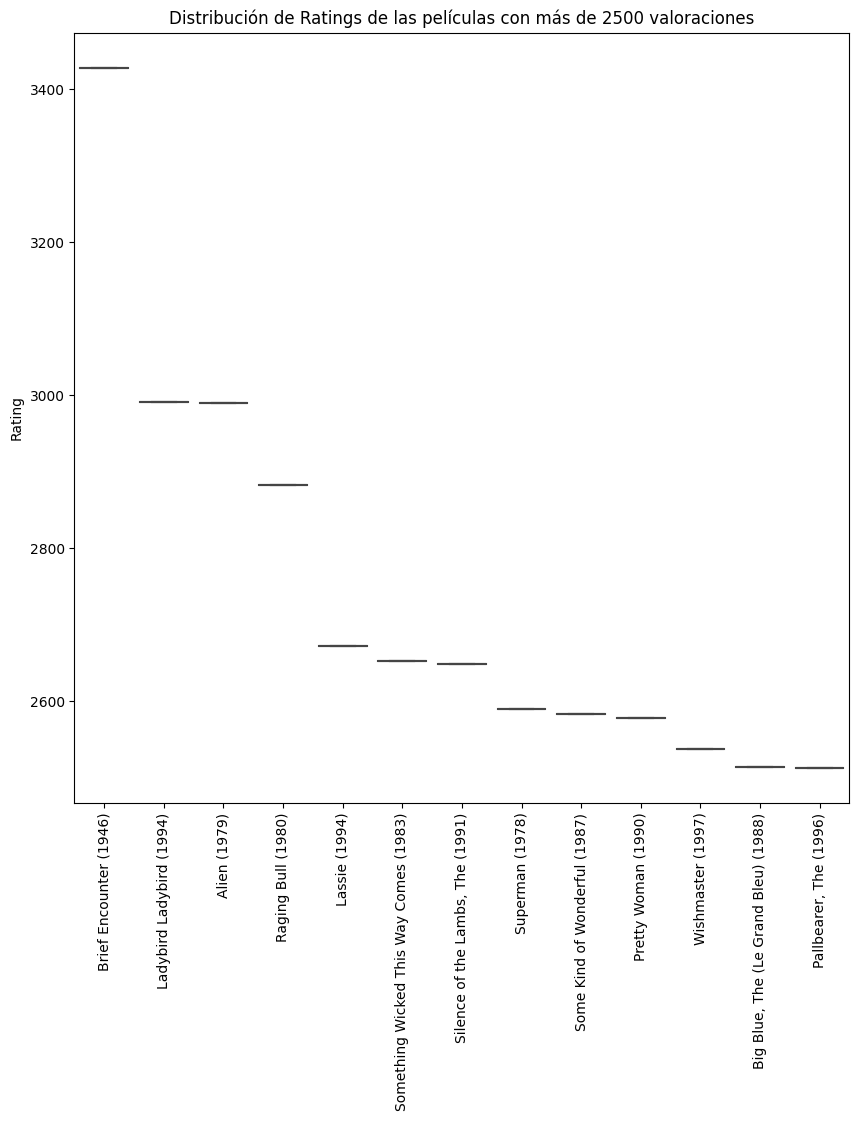

In [33]:
def visualizar_boxplots(ratings_filtrados_con_nombre):
    import seaborn as sns
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title('Distribución de Ratings de las películas con más de 2500 valoraciones')
    plot = sns.boxplot(x=ratings_filtrados_con_nombre['title'],y= ratings_filtrados_con_nombre['rating'], ax=ax)
    ax.set(xlabel=None, ylabel='Rating')
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

visualizar_boxplots(ratings_filtrados_con_nombre)

<details><summary>Solución</summary>

```python
ratings = pd.read_csv('../../Datasets/MovieLens/ratings-raw.csv')
movies = pd.read_csv('../../Datasets/MovieLens/movies-separated_by_money-raw.csv', sep='$', index_col=0)
conteo_de_valoraciones = ratings['movie_id'].value_counts()
filtro_de_pelis_valoradas_mas_de_2500_veces = conteo_de_valoraciones > 2500
conteo_de_pelis_valoradas_mas_de_2500_veces = conteo_de_valoraciones[filtro_de_pelis_valoradas_mas_de_2500_veces]
ids_de_pelis_valoradas_mas_de_2500_veces = conteo_de_pelis_valoradas_mas_de_2500_veces.index
def id_esta_en_lista_de_ids(lista_de_ids, id_):
    return id_ in lista_de_ids
filtro_de_ratings = ratings['movie_id'].apply(lambda x: id_esta_en_lista_de_ids(ids_de_pelis_valoradas_mas_de_2500_veces, x))
ratings_filtrados = ratings[filtro_de_ratings]
ratings_filtrados_con_nombre = pd.merge(ratings_filtrados, movies['title'], left_on='movie_id', right_index=True)
```
    
</details>